In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prepData import *
from SimpleRegressions import *
from plotterUtils import *

In [2]:
#df = raw_data()
#df_perevt = event_level_data()
df_perjet = jet_level_data()

In [9]:
df_train,df_test = np.array_split(df_perjet,2)

simpleFeatures = ['jet_pt_ak7','jet_eta_ak7']

factorNames = ['jet_pt_ak7','jet_eta_ak7',
                 'jet_photonFrac_ak7',
                 'jet_electronFrac_ak7',
                 'jet_muonFrac_ak7',
                 'jet_neuHadronFrac_ak7',
                 'jet_charHadronFrac_ak7',
                 'jet_electronMult_ak7',
                 'jet_muonMult_ak7',
                 'jet_photonMult_ak7',
                 'jet_neuHadronMult_ak7',
                 'jet_charHadronMult_ak7'
                ]

allFactors = ['jet_pt_ak7','jet_eta_ak7',
                 'jet_photonFrac_ak7',
                 'jet_electronFrac_ak7',
                 'jet_muonFrac_ak7',
                 'jet_neuHadronFrac_ak7',
                 'jet_charHadronFrac_ak7',
                 'jet_electronMult_ak7',
                 'jet_muonMult_ak7',
                 'jet_photonMult_ak7',
                 'jet_neuHadronMult_ak7',
                 'jet_charHadronMult_ak7'
                ]

normalFactors = [
                  'jet_eta_ak7',
                  'jet_photonFrac_ak7',
                  'jet_electronFrac_ak7',
                  'jet_muonFrac_ak7',
                  'jet_neuHadronFrac_ak7',
                  'jet_charHadronFrac_ak7',
                  'jet_electronMult_ak7',
                  'jet_muonMult_ak7',
                  'jet_photonMult_ak7',
                  'jet_neuHadronMult_ak7',
                  'jet_charHadronMult_ak7'
                    ]

scaleData = False
if( scaleData ):
    means = df_perjet.mean()
    rmss = df_perjet.std()

    for f in normalFactors:
        df_perjet[f] = map(lambda x : (x-means[f])/rmss[f],df_perjet[f])

rfr = random_forest_regression(factors=factorNames,regressor='jet_jes_ak7')
rfr.max_depth=40
rfr.fit(df_train,verbose=True)
rfr.test(df_test,verbose=True)

rfr_pteta = random_forest_regression(factors=simpleFeatures,regressor='jet_jes_ak7')
rfr_pteta.max_depth=40
rfr_pteta.fit(df_train,verbose=True,append="_pteta")
rfr_pteta.test(df_test,verbose=True,append="_pteta")

model = rfr.model

train:
RMSE: 0.00668750904527
test:
RMSE: 0.0246593366377
train:
RMSE: 0.00668750904527
test:
RMSE: 0.0366643287699


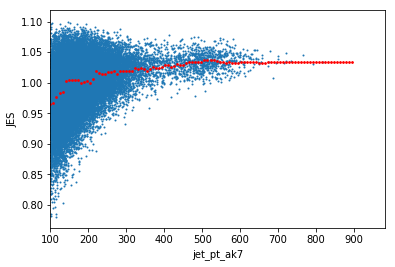

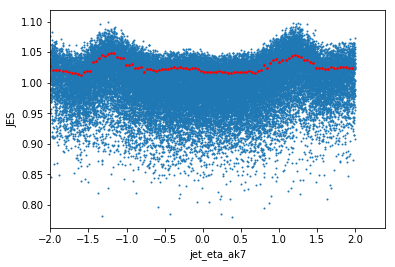

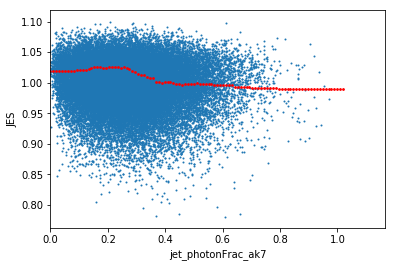

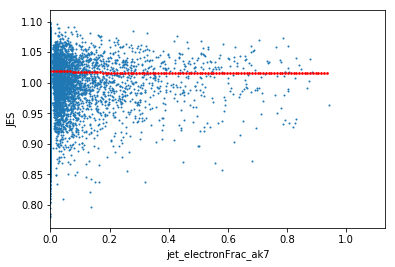

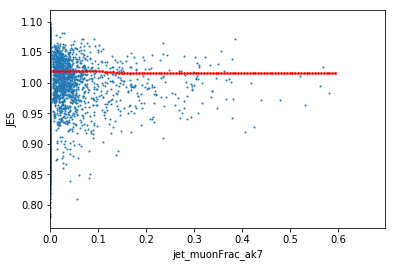

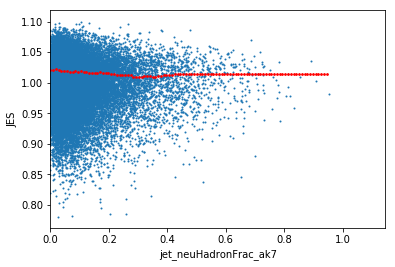

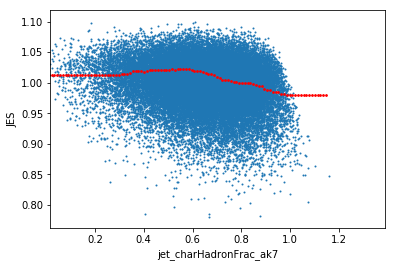

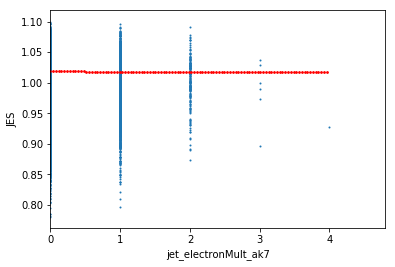

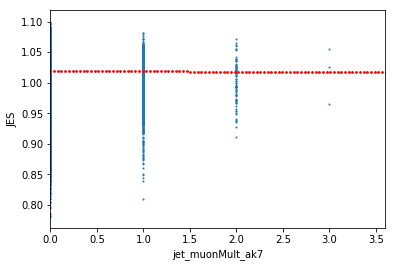

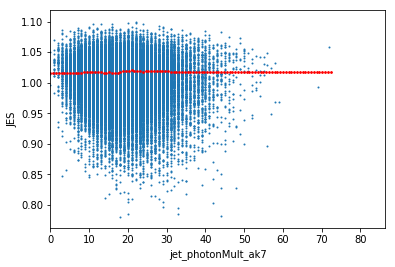

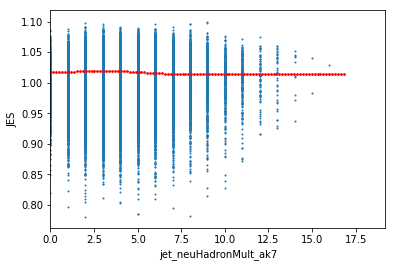

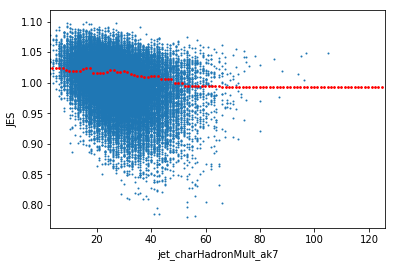

In [4]:
def generate_scan(xlow,xhigh,n=100,projectionVar='jet_pt_ak7'):
    scanData = []
    for f in factorNames:
        if f == projectionVar : 
            a = range(0,n+1)
            a = map(lambda x : xlow+x*(xhigh-xlow)/float(n+1),a)
            scanData.append(a)
        else :
            scanData.append([np.mean(df_perjet[f])]*(n+1))
    return np.array(scanData).transpose()

for i,f in enumerate(factorNames):
    #plt.subplot(3,4,i+1)
    scanX = generate_scan(min(df_perjet[f]),max(df_perjet[f]),100,f)
    #print len(scanX.transpose()[i])
    scanY = model.predict(scanX)
    #print len(scanY)
    plt.scatter(df_test[f],df_test['jet_jes_ak7'],s=1)
    plt.scatter(scanX.transpose()[i],scanY,s=3,color='r')
    plt.xlabel(f)
    plt.ylabel("JES")
    plt.xlim(min(df_test[f]),max(df_test[f])*1.2)
    plt.show()
    fig = plt.figure()
    fig.savefig(f+"_JES.png")

0.0366063040181


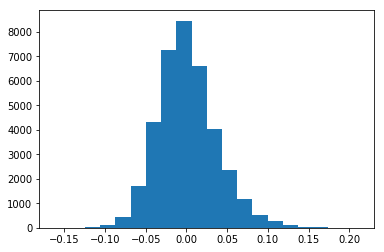

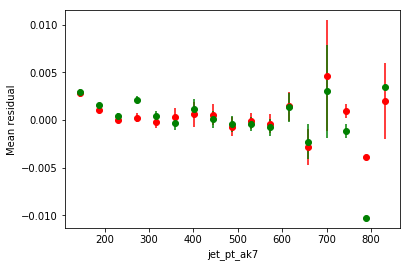

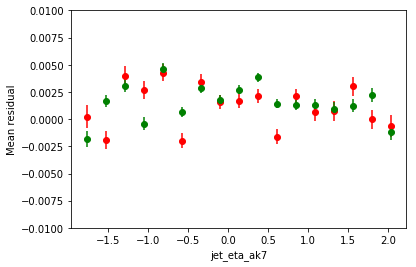

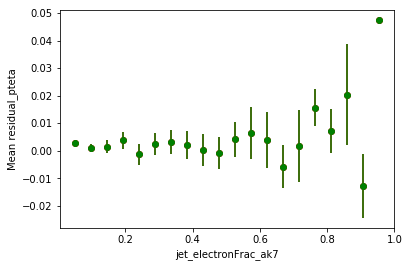

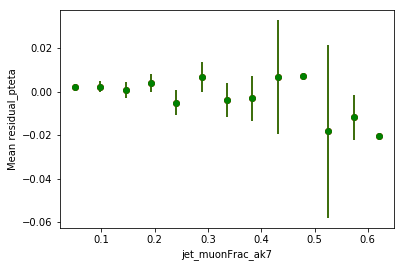

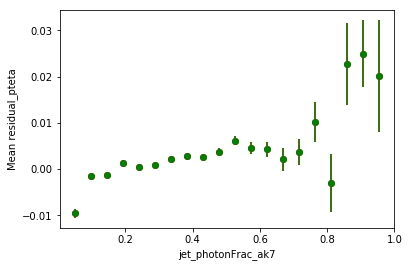

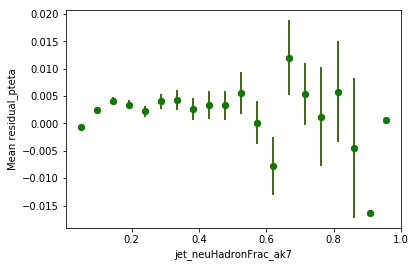

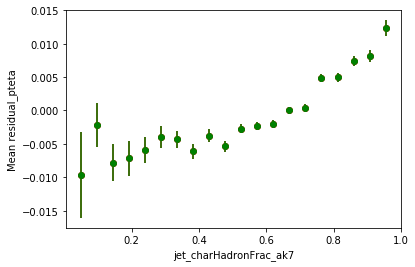

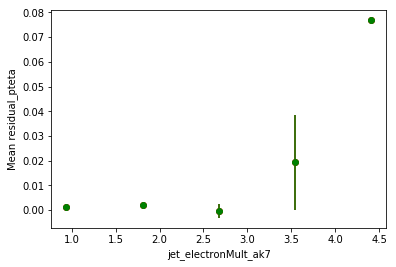

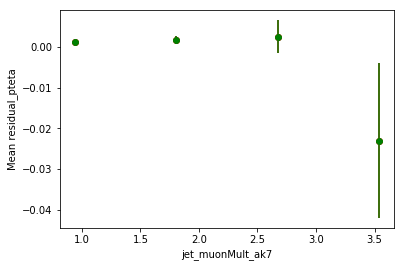

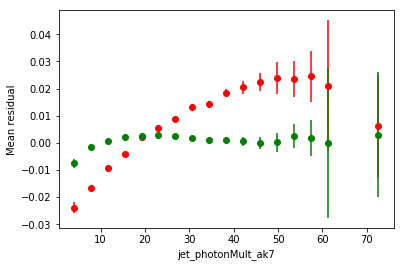

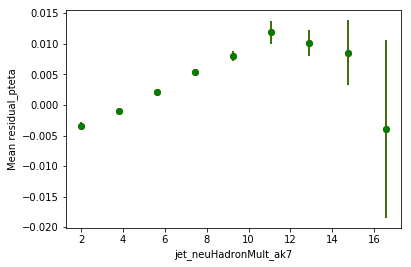

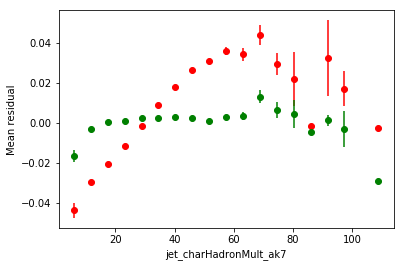

In [8]:
plot_var='residual_pteta'
df_test['res_sq'] = map(lambda x : x*x , df_test[plot_var])
print sqrt(df_test.sum()['res_sq']/len(df_test[plot_var]))

plt.hist(df_test[plot_var],20)
plt.show()

plotMean(df_test,plot_var,'jet_pt_ak7',20,100,1000)
plotMean(df_test,'residual','jet_pt_ak7',20,100,1000,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_eta_ak7',20,-2.5,2.5)
plotMean(df_test,'residual','jet_eta_ak7',20,-2.5,2.5,color='g')
plt.ylim(-0.01,0.01)
plt.show()
plotMean(df_test,plot_var,'jet_electronFrac_ak7',20,0.,1.)
plotMean(df_test,plot_var,'jet_electronFrac_ak7',20,0.,1.,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_muonFrac_ak7',20,0.,1.)
plotMean(df_test,plot_var,'jet_muonFrac_ak7',20,0.,1.,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_photonFrac_ak7',20,0.,1.)
plotMean(df_test,plot_var,'jet_photonFrac_ak7',20,0.,1.,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_neuHadronFrac_ak7',20,0.,1.)
plotMean(df_test,plot_var,'jet_neuHadronFrac_ak7',20,0.,1.,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_charHadronFrac_ak7',20,0.,1.)
plotMean(df_test,plot_var,'jet_charHadronFrac_ak7',20,0.,1.,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_electronMult_ak7',5,-0.1,5.1)
plotMean(df_test,plot_var,'jet_electronMult_ak7',5,-0.1,5.1,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_muonMult_ak7',5,-0.1,5.1)
plotMean(df_test,plot_var,'jet_muonMult_ak7',5,-0.1,5.1,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_photonMult_ak7',20,0.,80.)
plotMean(df_test,'residual','jet_photonMult_ak7',20,0.,80.,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_neuHadronMult_ak7',10,0.,20.)
plotMean(df_test,plot_var,'jet_neuHadronMult_ak7',10,0.,20.,color='g')
plt.show()
plotMean(df_test,plot_var,'jet_charHadronMult_ak7',20,0.,120.)
plotMean(df_test,'residual','jet_charHadronMult_ak7',20,0.,120.,color='g')
plt.show()
